In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.001]
a = [1]
b = [0.01]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

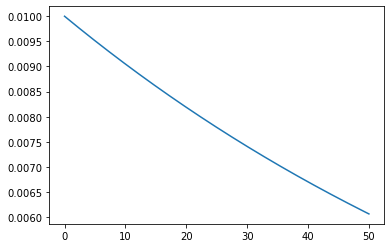

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
lambda_dist.rvs(10)

array([ 21.16567928,  30.86645945, 128.97368763, 138.65820938,
         4.07389769,  62.32744912, 283.95660821,  97.7328997 ,
        75.79006115,  77.10538197])

In [5]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [27]:
dist = multivariate_normal([0, 0], [[50, 3],[3, 50]])
data = dist.rvs(100)

# data = data.x_00121 

In [25]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.scatter(xs, ys)
    plt.show()

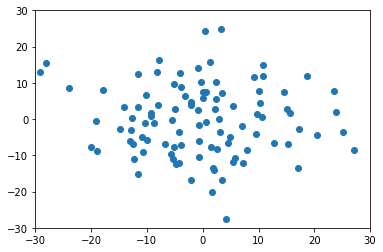

In [26]:
draw_data(data)

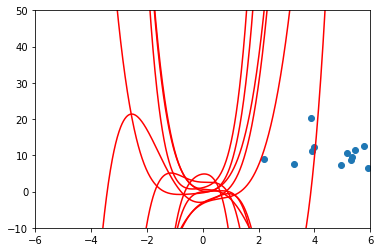

In [9]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for mld in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,50)
    plt.show()
   
draw_estimates(10, data)

In [10]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

In [11]:
update(data[:5])
draw_estimates(10, data[:5])

LinAlgError: singular matrix

In [ ]:
update(data[:10])
draw_estimates(10, data[:10])

In [ ]:
update(data[:50])
draw_estimates(10, data[:50])

In [ ]:
mu

In [ ]:
a

In [ ]:
b

In [ ]:
1/np.sqrt(lmd)

In [ ]:
draw(lambda_dist, 0, 5, 0.01)

In [ ]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data